# 1. Exploración de los datos

In [32]:
#Importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4= pd.read_csv(url4)


In [19]:
# Agregando una columna para identificar la tienda
tienda_1['tienda'] = 'Tienda 1'
tienda_2['tienda'] = 'Tienda 2'
tienda_3['tienda'] = 'Tienda 3'
tienda_4['tienda'] = 'Tienda 4'

# Unir los datos en un solo DataFrame
df = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)
# Visualizando las primeras filas
# 1 Visualizamos los ingresos totales por tienda

df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


# 2. Análisis de facturación

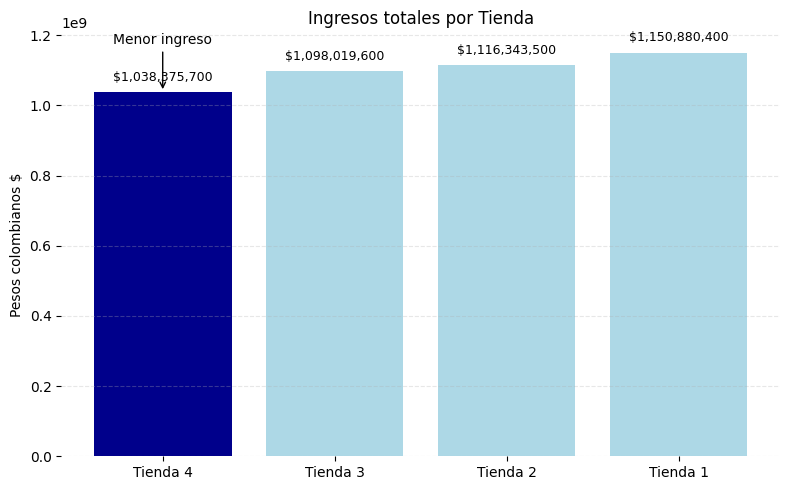

In [41]:
# 1) Calcular ingresos por tienda
ingresos = df.groupby('tienda')['Precio'].sum().sort_values().round(0)

# 2) Preparar etiquetas y valores
labels = ingresos.index.astype(str).tolist()
values = ingresos.values

# 3) Identificar la tienda con menor ingreso (etiqueta)
min_label = ingresos.idxmin()

# 4) Crear lista de colores: rojo para la tienda mínima, celeste para las demás
colors = ['darkblue' if lab == min_label else 'lightblue' for lab in labels]

# 5) Dibujar el gráfico con matplotlib (control total de colores)
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(range(len(values)), values, color=colors)

# Ajustes de ejes y etiquetas
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_title('Ingresos totales por Tienda')
ax.set_ylabel('Pesos colombianos $')
ax.set_xlabel('')

# 6) Añadir el valor numérico encima de cada barra (formato con separador de miles)
max_val = values.max() if len(values) else 0
for bar in bars:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + max_val * 0.02,                # un pequeño offset sobre la barra
        f"${h:,.0f}",                      # formato con separador de miles
        ha='center',
        va='bottom',
        fontsize=9
    )

# 7) Opcional: anotar cuál es la tienda con menor ingreso
min_idx = labels.index(min_label)
ax.annotate('Menor ingreso',
            xy=(min_idx, values[min_idx]),
            xytext=(min_idx, values[min_idx] + max_val * 0.12),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            ha='center')

# 8) Limpiar bordes y mostrar rejilla horizontal ligera
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Ventas por categoría

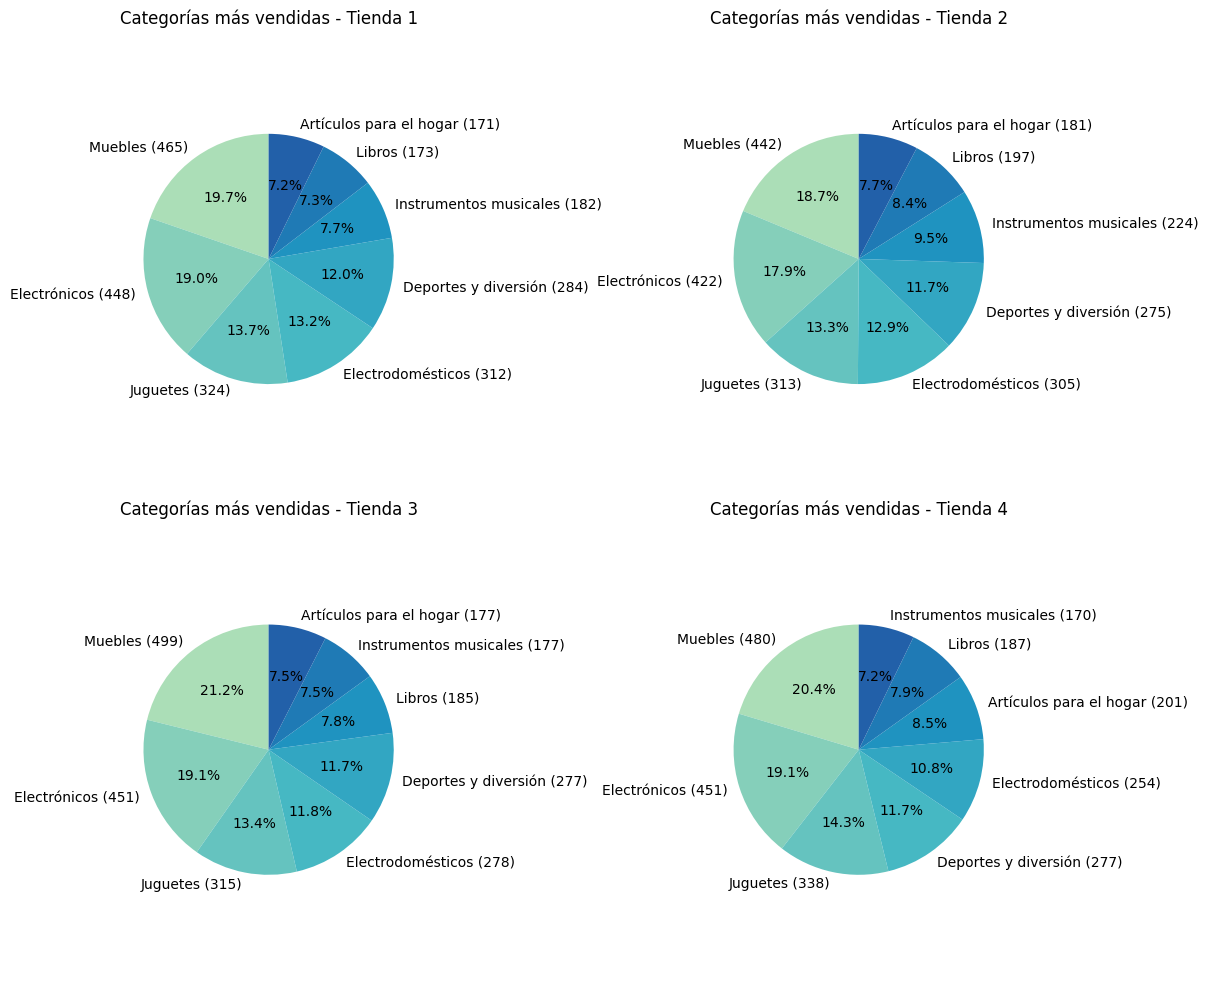

In [39]:
#colors=['blue','cyan', 'skyblue','navy',]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
titulos = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
# Colores en escala azul
#colores = plt.cm.Blues(np.linspace(0.4, 1, len(df.columns) - 1))
#colores = plt.cm.PuBuGn(np.linspace(0.3, 1, len(df.columns)-1))
colores = plt.cm.YlGnBu(np.linspace(0.3, 1, len(df.columns)-1))
#colores = plt.cm.cool(np.linspace(0, 1, len(df.columns)-1))
#colores = plt.cm.cividis(np.linspace(0, 1,len(df.columns)-1))

for ax, tienda, titulo in zip(axs.flatten(), tiendas, titulos):
    categorias = tienda['Categoría del Producto'].value_counts()

    # Etiquetas con nombre de categoría + valor absoluto
    etiquetas = [f"{cat} ({valor})" for cat, valor in zip(categorias.index, categorias.values)]

    ax.pie(
        categorias,
        labels=etiquetas,
        autopct='%1.1f%%',colors=colores,
        startangle=90
    )
    ax.set_title(f"Categorías más vendidas - {titulo}")
    ax.axis('equal')  # Mantener forma circular

plt.tight_layout()
plt.show()

# 5. Calificación promedio de la tienda

In [30]:
# Calculamos las calificaciones promedio de los clientes para cada tienda
# El objetivo es conocer la satisfacción del cliente con los productos vendidos.
promedios = {'Tienda 1': round(tienda_1['Calificación'].mean(), 2),
            'Tienda 2': round(tienda_2['Calificación'].mean(), 2),
            'Tienda 3': round(tienda_3['Calificación'].mean(), 2),
            'Tienda 4': round(tienda_4['Calificación'].mean(), 2),
}

# Mostrar resultados
print(" Calificación promedio por tienda:")
for tienda, calificacion in promedios.items():
    print(f"{tienda}: {calificacion} estrellas")

 Calificación promedio por tienda:
Tienda 1: 3.98 estrellas
Tienda 2: 4.04 estrellas
Tienda 3: 4.05 estrellas
Tienda 4: 4.0 estrellas


# 4. Productos más y menos vendidos

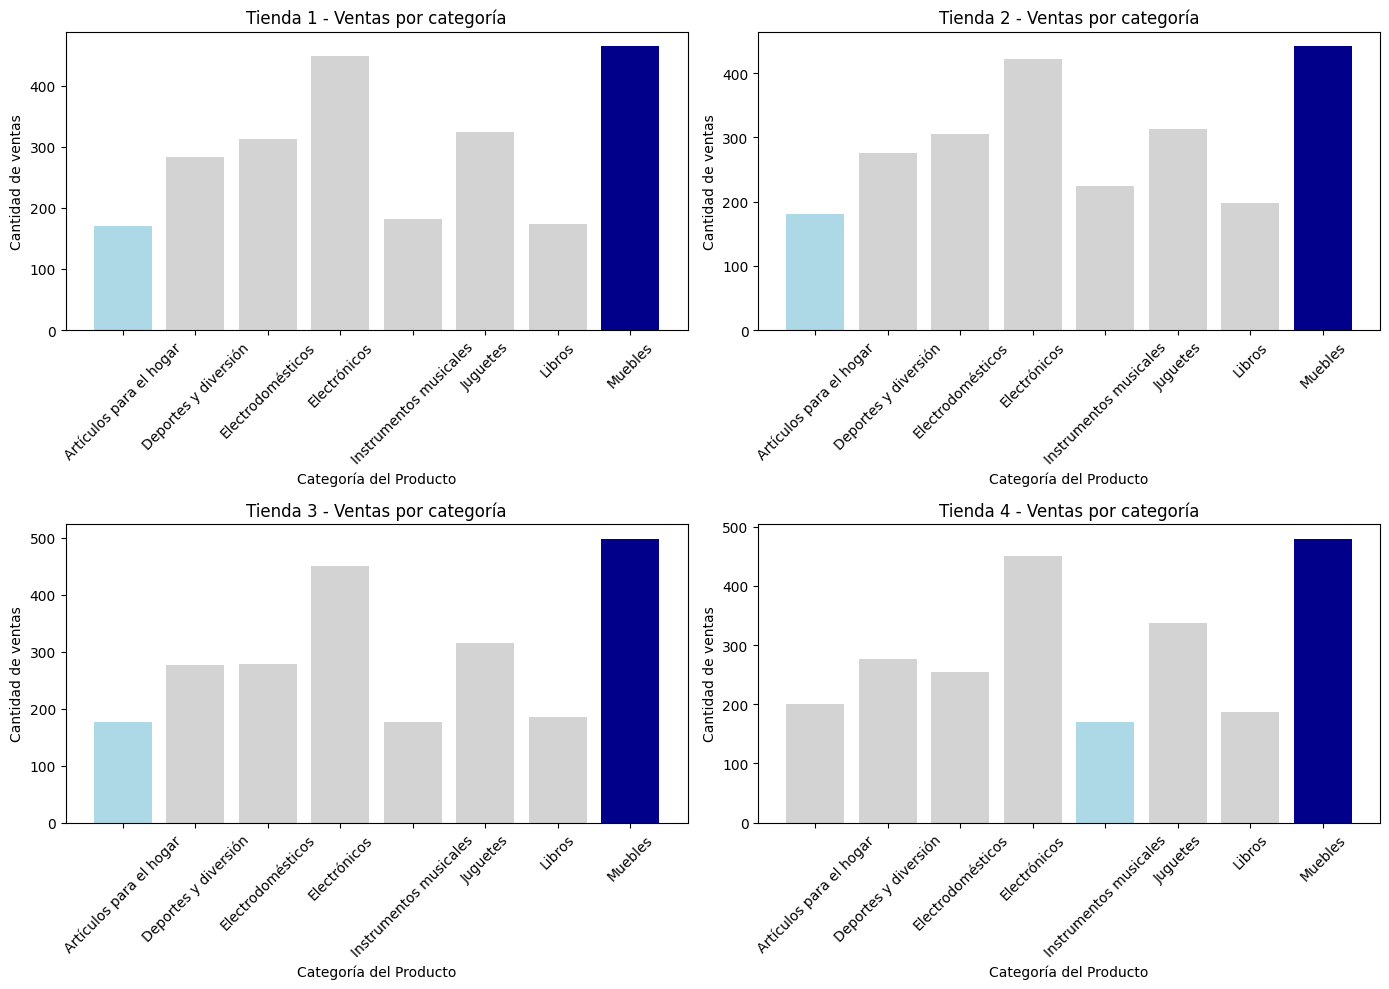

In [42]:
# Agrupar por tienda y categoría para contar cantidad de productos vendidos
ventas_categoria = df.groupby(['tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de ventas')

# Configurar subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Iterar por tienda y generar gráfico
for i, tienda in enumerate(ventas_categoria['tienda'].unique()):
    # Filtrar datos de la tienda
    datos_tienda = ventas_categoria[ventas_categoria['tienda'] == tienda]

    # Encontrar la categoría más y menos vendida
    max_cat = datos_tienda.loc[datos_tienda['Cantidad de ventas'].idxmax(), 'Categoría del Producto']
    min_cat = datos_tienda.loc[datos_tienda['Cantidad de ventas'].idxmin(), 'Categoría del Producto']

    # Asignar colores
    colores = datos_tienda['Categoría del Producto'].apply(
        lambda x: 'darkblue' if x == max_cat else ('lightblue' if x == min_cat else 'lightgray')
    )

    # Graficar
    axs[i].bar(datos_tienda['Categoría del Producto'], datos_tienda['Cantidad de ventas'], color=colores)
    axs[i].set_title(f"{tienda} - Ventas por categoría")
    axs[i].set_xlabel("Categoría del Producto")
    axs[i].set_ylabel("Cantidad de ventas")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Envío promedio por tienda

In [58]:
costo_promedio_envio = df.groupby('tienda')['Costo de envío'].mean().round(2)
print(f"El costo promedio por tienda fue:\n{costo_promedio_envio}" )

El costo promedio por tienda fue:
tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64


In [66]:
#Comparando el precio y calificación del cliente de cada una de las tienda
descripcion = df.groupby('tienda')[['Precio','Calificación','Costo de envío']].describe()
descripcion

Precio                                                           \
           count           mean            std     min      25%       50%   
tienda                                                                      
Tienda 1  2359.0  487867.910131  614686.765387  7600.0  55750.0  235300.0   
Tienda 2  2359.0  473227.426876  595559.549624  7600.0  54550.0  218200.0   
Tienda 3  2359.0  465459.771089  580643.391372  7600.0  57400.0  226300.0   
Tienda 4  2358.0  440362.892282  568755.603949  7600.0  53400.0  209450.0   

                              Calificación            ...            \
               75%        max        count      mean  ...  75%  max   
tienda                                                ...             
Tienda 1  678100.0  2977000.0       2359.0  3.976685  ...  5.0  5.0   
Tienda 2  677700.0  2953400.0       2359.0  4.037304  ...  5.0  5.0   
Tienda 3  666050.0  2968200.0       2359.0  4.048326  ...  5.0  5.0   
Tienda 4  634225.0  2902200.0       2358.0  3.995759  ...  5.0  5.0   

         Costo de envío                                                    \
                  count          mean           std  min     25%      50%   
tienda                                                                      
Tienda 1         2359.0  26018.609580  32860.001783  0.0  3100.0  12400.0   
Tienda 2         2359.0  25216.235693  31741.375166  0.0  2900.0  11600.0   
Tienda 3         2359.0  24805.680373  30945.889626  0.0  3100.0  11900.0   
Tienda 4         2358.0  23459.457167  30279.100836  0.0  2900.0  10950.0   

                             
              75%       max  
tienda                       
Tienda 1  36000.0  160800.0  
Tienda 2  35450.0  162500.0  
Tienda 3  34950.0  158400.0  
Tienda 4  33300.0  154700.0  

[4 rows x 24 columns]

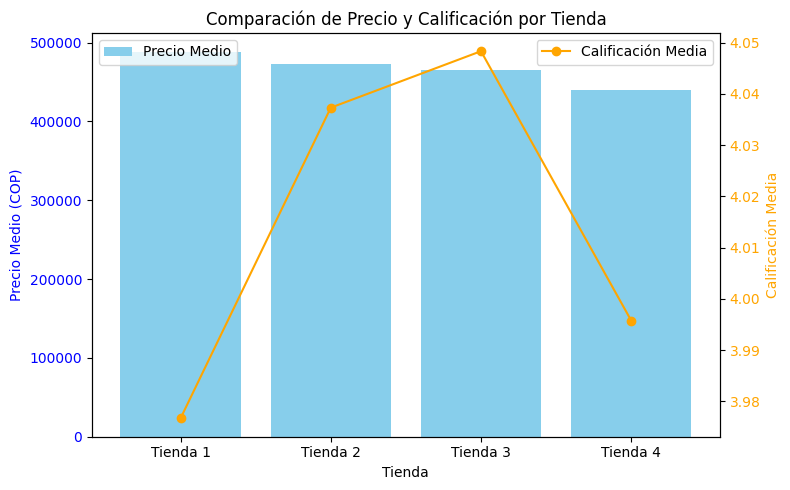

In [67]:
# Datos del resumen
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Precio Medio': [487867.91, 473227.43, 465459.77, 440362.89],
    'Calificación Media': [3.976685, 4.037304, 4.048326, 3.995759]
}

df = pd.DataFrame(data)

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(8, 5))

# Gráfico de barras (Precio Medio)
ax1.bar(df['Tienda'], df['Precio Medio'], color='skyblue', label='Precio Medio')
ax1.set_xlabel('Tienda')
ax1.set_ylabel('Precio Medio (COP)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear segundo eje para Calificación Media
ax2 = ax1.twinx()
ax2.plot(df['Tienda'], df['Calificación Media'], color='orange', marker='o', label='Calificación Media')
ax2.set_ylabel('Calificación Media', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Título
plt.title('Comparación de Precio y Calificación por Tienda')

# Leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# **Informe**

## Introducción:
El Sr. Juan busca decidir qué tienda de la cadena Alura Store vender para financiar un nuevo emprendimiento. Para tomar esta decisión, se realizó un análisis comparativo de las cuatro tiendas en términos de ingreso promedio de productos, calificación promedio de clientes y costo promedio de envío.
El objetivo es identificar la tienda menos eficiente en relación con sus pares, evaluando sus fortalezas y debilidades.

##Desarrollo del análisis:
1. Ingreso promedio en pesos colombianos por tienda

Tienda 1: $ 1 150 880 400

Tienda 2: $ 1 116 343 500

Tienda 3: $ 1 098 019 600

Tienda 4: $ 1 038 375 700 (menor precio promedio)

💡 Un ingreso promedio más bajo podría indicar menor margen de ganancia por producto.

2. Calificación promedio

Tienda 1: 3.98

Tienda 2: 4.04

Tienda 3: 4.05 (mejor calificación)

Tienda 4: 3.99

💡 La Tienda 4 tiene una calificación similar a la Tienda 1, pero por debajo de Tienda 2 y Tienda 3, lo que indica menor satisfacción del cliente.

3. Costo promedio de envío en pesos colombianos

Tienda 1: $ 26,018.61

Tienda 2: $ 25,216.24

Tienda 3: $ 24,805.68

Tienda 4: $ 23,459.46 (menor costo promedio)

💡 El costo de envío más bajo de la Tienda 4 puede ser positivo para el cliente, pero también sugiere que podría estar manejando zonas de distribución más limitadas o con menor alcance.

Analizando en conjunto:

Fortalezas de Tienda 4: menor precio y menor costo de envío.

Debilidades de Tienda 4: menor calificación promedio junto con Tienda 1, lo que indica menor satisfacción del cliente, y precios bajos que podrían estar reduciendo la rentabilidad.

Comparada con el resto, no presenta una ventaja competitiva clara: no lidera en satisfacción, no tiene los precios más rentables y el menor costo de envío no compensa la percepción del cliente.


📌 Conclusión y Recomendación:

Vender la Tienda 4.

Es la que muestra menor eficiencia global: tiene el menor ingresos promedio de las 4 tiendas, en la satisfacción del cliente no destaca y, aunque su costo de envío es reducido, no es suficiente para posicionarla mejor que las demás.

Esto la convierte en la candidata ideal para venderla o reestructurarla, manteniendo la cadena las tiendas con mayor calificación y precios más competitivos en términos de rentabilidad.
